Total cell count (excluding edge cells): 60
Cell properties saved to cell_properties.csv


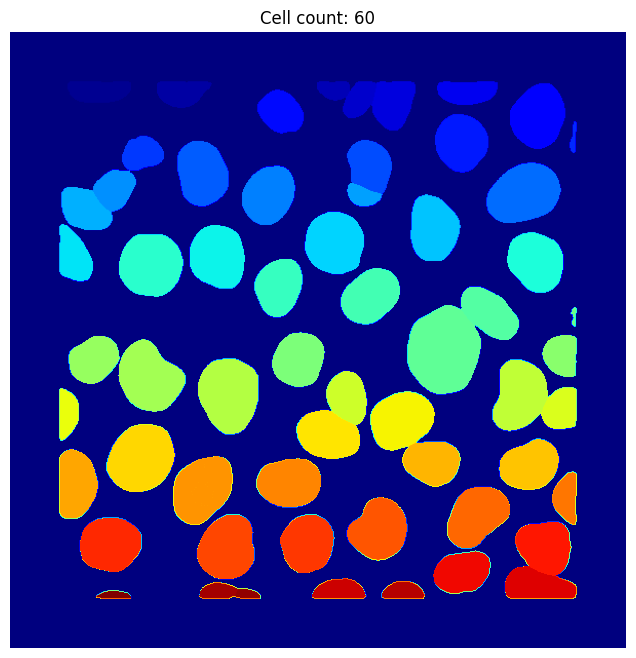

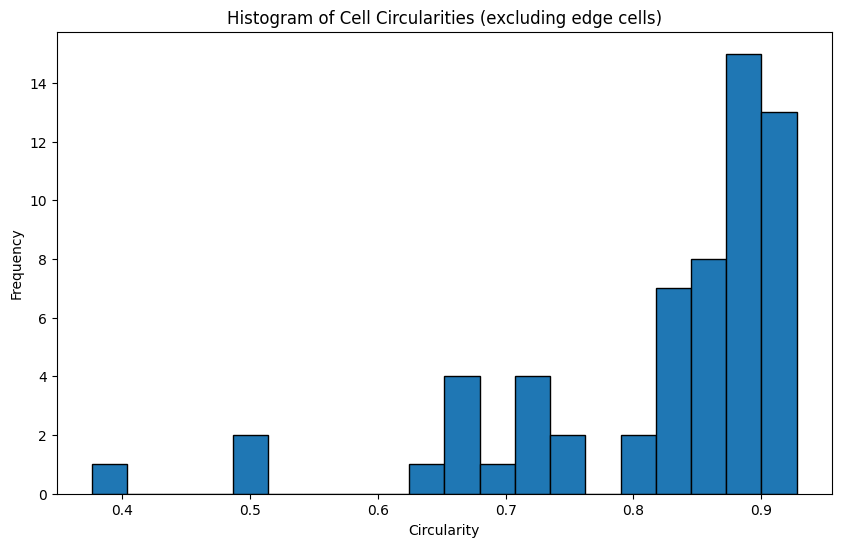

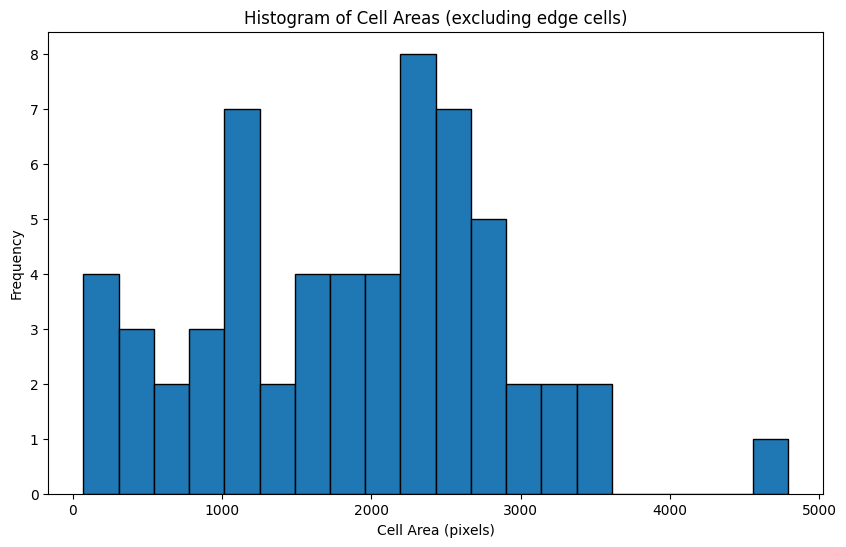

In [3]:
# Step 1: 安装必要库
!pip install cellpose scikit-image

# Step 2: 导入必要的库
from cellpose import models, io
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import csv

# Step 3: 设置图像路径
image_path = '/content/outline before.png'  # 替换为你的图像路径

# Step 4: 加载并分割图像
model = models.Cellpose(gpu=True, model_type='cyto')  # 使用 'cyto' 模型
img = io.imread(image_path)

# 运行 Cellpose 分割
masks, flows, styles, diams = model.eval(img, diameter=None, flow_threshold=0.4, cellprob_threshold=0.0)

# Step 5: 计算细胞数量、面积、周长和圆度，去除边缘细胞
props = measure.regionprops(masks)
cell_data = []  # 用于存储每个细胞的信息

for prop in props:
    minr, minc, maxr, maxc = prop.bbox
    if minr > 0 and minc > 0 and maxr < masks.shape[0] and maxc < masks.shape[1]:
        area = prop.area  # 面积
        perimeter = prop.perimeter  # 周长
        if perimeter > 0:  # 避免除以零
            circularity = (4 * np.pi * area) / (perimeter ** 2)  # 圆度公式
        else:
            circularity = 0
        cell_data.append({
            "Cell_ID": prop.label,
            "Area": area,
            "Perimeter": perimeter,
            "Circularity": circularity
        })

# 输出细胞总数
cell_count = len(cell_data)
print(f"Total cell count (excluding edge cells): {cell_count}")

# 将结果保存为 CSV 文件
output_file = "cell_properties.csv"
with open(output_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Cell_ID", "Area", "Perimeter", "Circularity"])
    writer.writeheader()
    writer.writerows(cell_data)

print(f"Cell properties saved to {output_file}")

# Step 6: 可视化分割结果
plt.figure(figsize=(8, 8))
plt.imshow(masks, cmap='jet')  # 显示掩膜图像
plt.title(f"Cell count: {cell_count}")
plt.axis('off')
plt.show()

# Step 7: 绘制细胞圆度的直方图
circularities = [cell['Circularity'] for cell in cell_data]
plt.figure(figsize=(10, 6))
plt.hist(circularities, bins=20, edgecolor='black')
plt.title("Histogram of Cell Circularities (excluding edge cells)")
plt.xlabel("Circularity")
plt.ylabel("Frequency")
plt.show()

# Step 8: 绘制细胞面积的直方图
areas = [cell['Area'] for cell in cell_data]
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=20, edgecolor='black')
plt.title("Histogram of Cell Areas (excluding edge cells)")
plt.xlabel("Cell Area (pixels)")
plt.ylabel("Frequency")
plt.show()


In [4]:
import os
print(os.path.exists(image_path))  # 如果返回 False，说明路径有问题


True


Total cell count (excluding edge cells): 59
Cell properties saved to cell_properties after.csv


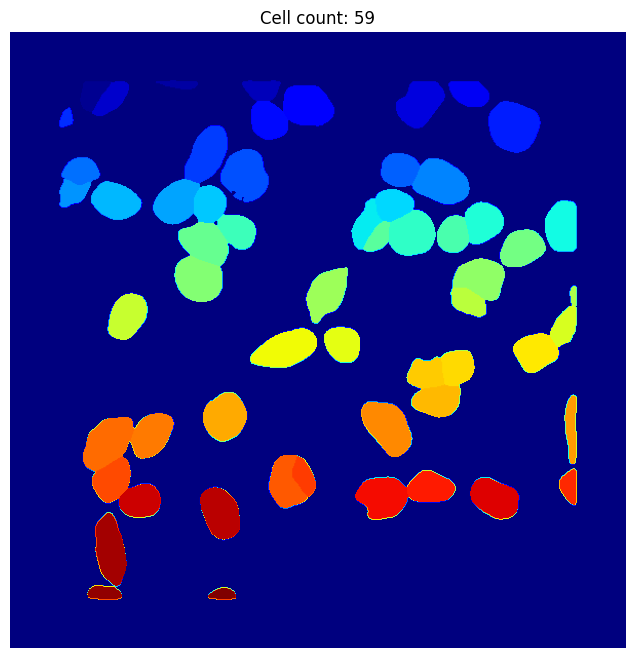

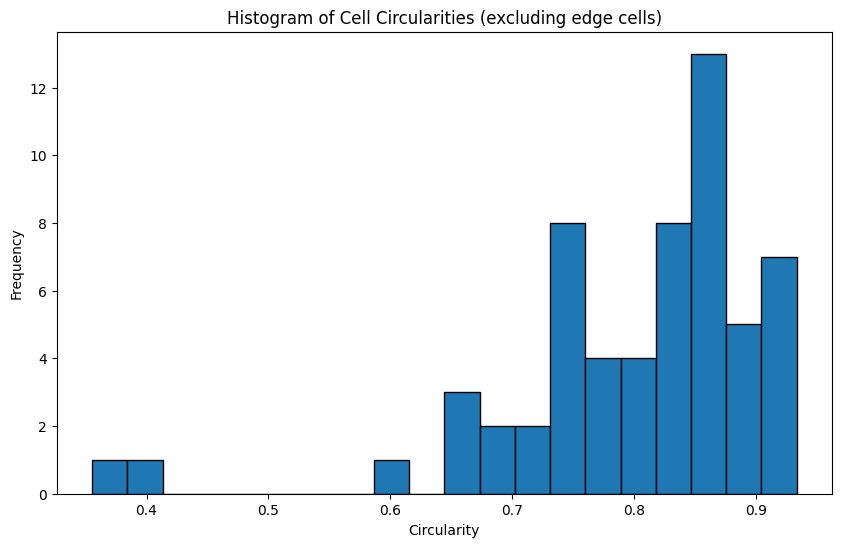

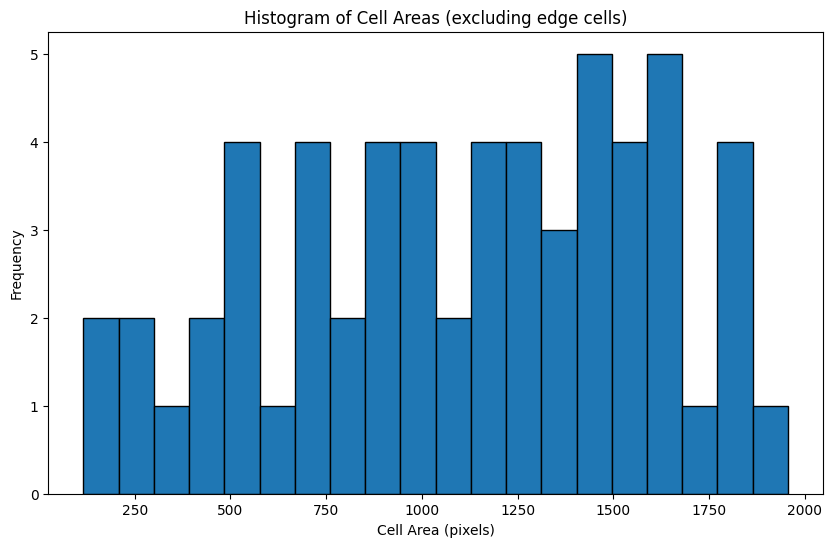

In [5]:
# Step 1: 安装必要库
!pip install cellpose scikit-image

# Step 2: 导入必要的库
from cellpose import models, io
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import csv

# Step 3: 设置图像路径
image_path = '/content/outline after.png'  # 替换为你的图像路径

# Step 4: 加载并分割图像
model = models.Cellpose(gpu=True, model_type='cyto')  # 使用 'cyto' 模型
img = io.imread(image_path)

# 运行 Cellpose 分割
masks, flows, styles, diams = model.eval(img, diameter=None, flow_threshold=0.4, cellprob_threshold=0.0)

# Step 5: 计算细胞数量、面积、周长和圆度，去除边缘细胞
props = measure.regionprops(masks)
cell_data = []  # 用于存储每个细胞的信息

for prop in props:
    minr, minc, maxr, maxc = prop.bbox
    if minr > 0 and minc > 0 and maxr < masks.shape[0] and maxc < masks.shape[1]:
        area = prop.area  # 面积
        perimeter = prop.perimeter  # 周长
        if perimeter > 0:  # 避免除以零
            circularity = (4 * np.pi * area) / (perimeter ** 2)  # 圆度公式
        else:
            circularity = 0
        cell_data.append({
            "Cell_ID": prop.label,
            "Area": area,
            "Perimeter": perimeter,
            "Circularity": circularity
        })

# 输出细胞总数
cell_count = len(cell_data)
print(f"Total cell count (excluding edge cells): {cell_count}")

# 将结果保存为 CSV 文件
output_file = "cell_properties after.csv"
with open(output_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Cell_ID", "Area", "Perimeter", "Circularity"])
    writer.writeheader()
    writer.writerows(cell_data)

print(f"Cell properties saved to {output_file}")

# Step 6: 可视化分割结果
plt.figure(figsize=(8, 8))
plt.imshow(masks, cmap='jet')  # 显示掩膜图像
plt.title(f"Cell count: {cell_count}")
plt.axis('off')
plt.show()

# Step 7: 绘制细胞圆度的直方图
circularities = [cell['Circularity'] for cell in cell_data]
plt.figure(figsize=(10, 6))
plt.hist(circularities, bins=20, edgecolor='black')
plt.title("Histogram of Cell Circularities (excluding edge cells)")
plt.xlabel("Circularity")
plt.ylabel("Frequency")
plt.show()

# Step 8: 绘制细胞面积的直方图
areas = [cell['Area'] for cell in cell_data]
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=20, edgecolor='black')
plt.title("Histogram of Cell Areas (excluding edge cells)")
plt.xlabel("Cell Area (pixels)")
plt.ylabel("Frequency")
plt.show()
